In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import classificacao

sns.set_style('darkgrid')
%matplotlib inline

In [6]:
# Configura Modelo e teste com 70%-30%
df = pd.read_csv('conhecimento_filtrado.csv')
df = df[df.verifica.isin([1,3])]
df1 = df[df.verifica==1].copy().reset_index(drop=True)
df3_full = df[df.verifica==3].copy().reset_index(drop=True)

ids_3 = np.random.choice(df3_full.id, len(df1), replace=False)
df3 = df[df.id.isin(ids_3)].copy().reset_index(drop=True)

df_conhecimento = pd.concat([df1, df3])
print(df_conhecimento.shape)

# Gera amostra para teste
parte_30 = int((len(df_conhecimento)/100)*30)
ids_30 = np.random.choice(df_conhecimento.id, parte_30, replace=False)
teste_original = df_conhecimento[df_conhecimento.id.isin(ids_30)].copy().reset_index(drop=True)
teste = teste_original.copy()
teste['verifica'] = 0
print(len(teste_original))

# Modelo
modelo = df_conhecimento[~df_conhecimento.id.isin(ids_30)].copy()
print(len(modelo))
print(modelo.verifica.value_counts())

(25786, 13)
7735
18051
3    9055
1    8996
Name: verifica, dtype: int64


In [7]:
y_pred = classificacao.classifica(modelo, teste)
y_true = teste_original.sort_values('id').reset_index(drop=True)

Criando classificador RF
RF - Classifica dado usando as colunas ['medianb5', 'nbrl']
Classificando com NN
Cria avaliacao usando (RF+NN)/2 - Arredondado para 3 casas decimais


Confusion matrix, without normalization
[[2920  977]
 [  65 3773]]
Normalized confusion matrix
[[0.74929433 0.25070567]
 [0.0169359  0.9830641 ]]


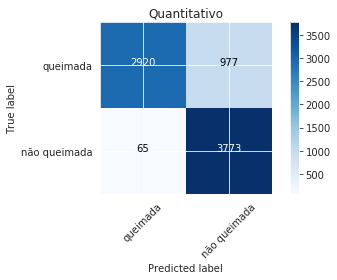

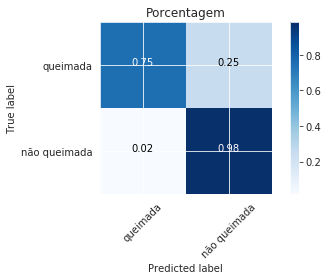

Acertos: 6693/7735 (86%)


In [8]:
classificacao.mostra_resultado(y_pred, y_true)